## **Tugas Praktikum**
Klasterisasi Data Nasabah Kartu Kredit

In [85]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

### **Load Data**

In [86]:
df = pd.read_csv('dataset/CC_Customer_Dataset.csv')
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


### **1. Buatlah scatterplot berdasarkan dataset menggunakan dua variabel, yaitu Avg_Credit_Limit dan Total_credit_card. Apakah sebaran data dapat dikatakan linier?**

Pertama menseleksi fitur, mengambil data yang akan digunakan dan menghapus data yang tidak digunakan

In [87]:
X = df.iloc[:, 2:]
print('Fitur yang digunakan:', list(X.columns))
X.head()

Fitur yang digunakan: ['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank', 'Total_visits_online', 'Total_calls_made']


,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


melakukan proses plot menggunakan scatter plot untuk melihat sebaran data berdasarkan 2 fitur, yaitu Avg_Credit_Limit dan Total_Credit_Card.

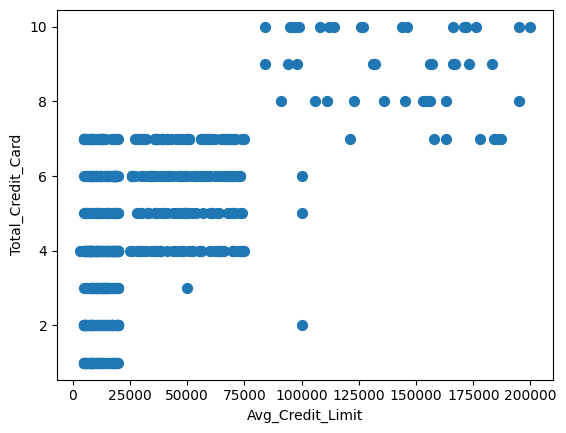

In [88]:
plt.xlabel('Avg_Credit_Limit')
plt.ylabel('Total_Credit_Card')
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s = 50)

**Jawaban:**

Berdasarkan scatter plot antara Avg_Credit_Limit dan Total_Credit_Card, sebaran data tidak membentuk pola linier yang jelas. Titik-titik data tersebar cukup acak dan tidak mengikuti satu garis lurus, sehingga hubungan antara kedua variabel tersebut tidak dapat dikatakan linier.

### **2. Buatlah model klasterisasi dengan menggunakan model K-Means. Tentukan jumlah *k* yang terbaik dengan menggunakan elbow method. Lengkapi analisis Anda dengan linechart dan hasil analisis mengapa Anda memilih nilai tersebut.**

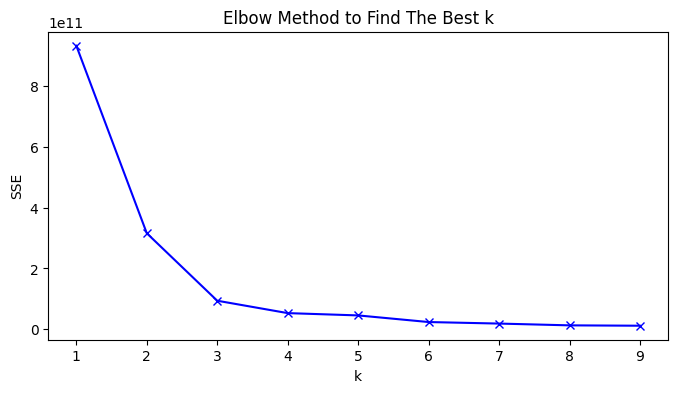

In [89]:
# Elbow Method untuk Menentukan k Terbaik
sse = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8,4))
plt.plot(K, sse, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('Elbow Method to Find The Best k')
plt.show()

**Analisis:**

Dari grafik linechart SSE terhadap nilai k di atas, titik siku (elbow) biasanya terlihat pada nilai k tertentu di mana penurunan SSE mulai melambat. Pilih nilai k pada posisi elbow tersebut sebagai jumlah cluster optimal. Misal, jika elbow terlihat pada k=3, maka k=3 adalah jumlah cluster terbaik untuk data ini.

Alasan memilih nilai tersebut adalah karena setelah titik elbow, penambahan jumlah cluster hanya menurunkan SSE sedikit, sehingga tidak efisien menambah cluster lebih banyak.

### **3. Gambarkan hasil klasterisasi dengan model K-Means dengan menggunakan scatterplot.**

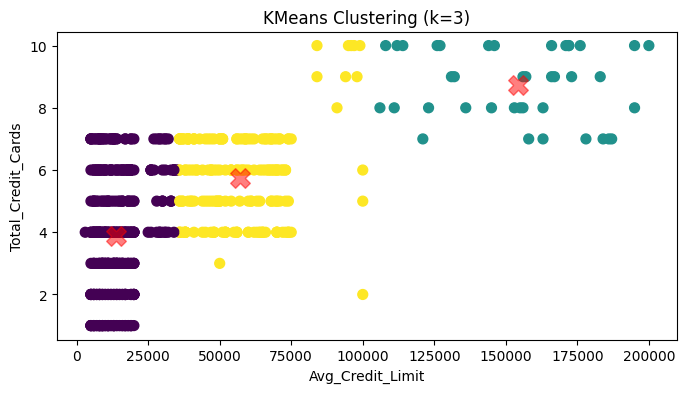

In [90]:
# Contoh membuat model KMeans dengan k terbaik (misal k=3, sesuaikan dengan hasil elbow)
k_optimal = 3  # ganti sesuai hasil elbow chart
kmeans_final = KMeans(n_clusters=k_optimal, random_state=42)
y_kmeans = kmeans_final.fit_predict(X)

# Visualisasi hasil klasterisasi pada dua fitur pertama
plt.figure(figsize=(8,4))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans_final.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5, marker='X')
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.title(f'KMeans Clustering (k={k_optimal})')
plt.show()

Plot di atas menunjukkan hasil klasterisasi data nasabah kartu kredit menggunakan K-Means. Setiap warna merepresentasikan satu cluster, dan tanda 'X' merah menunjukkan posisi centroid masing-masing cluster.

### **4. Buatlah model klasterisasi dengan menggunakan DBSCAN dengan seluruh variabel yang dapat digunakan.**

=== Data setelah normalisasi ===
   Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0          1.740187           -1.249225          -0.860451   
1          0.410293           -0.787585          -1.473731   
2          0.410293            1.058973          -0.860451   
3         -0.121665            0.135694          -0.860451   
4          1.740187            0.597334          -1.473731   

   Total_visits_online  Total_calls_made  
0            -0.547490         -1.251537  
1             2.520519          1.891859  
2             0.134290          0.145528  
3            -0.547490          0.145528  
4             3.202298         -0.203739  
=== Cluster ===
 0    609
 1     50
-1      1
Name: count, dtype: int64


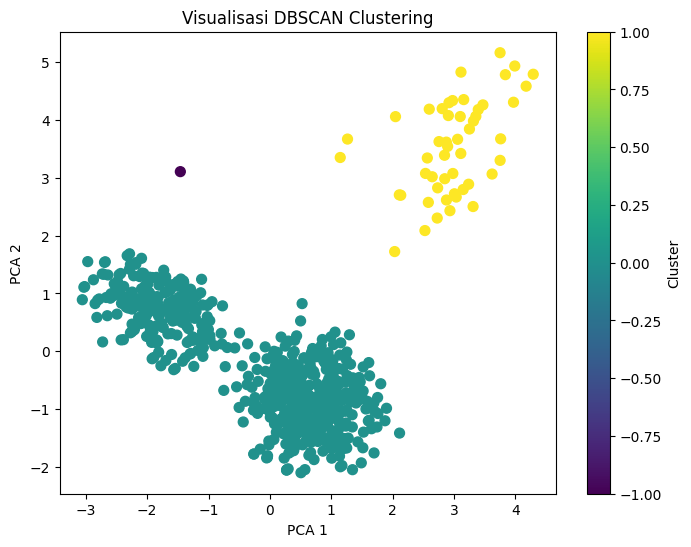

In [104]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA

X = df[["Avg_Credit_Limit", "Total_Credit_Cards", 
        "Total_visits_bank", "Total_visits_online", 
        "Total_calls_made"]]

# === 3. Normalisasi data ===
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

df_scaled = pd.DataFrame(X_scaled, columns=X.columns)
print("=== Data setelah normalisasi ===")
print(df_scaled.head())

# === 4. Buat model DBSCAN ===
dbscan = DBSCAN(eps=1.5, min_samples=5)  # parameter bisa disesuaikan
clusters = dbscan.fit_predict(X_scaled)

# === 5. Tambahkan hasil cluster ke dataframe ===
df["Cluster"] = clusters

# Lihat jumlah anggota tiap cluster
print(df["=== Cluster ==="].value_counts())

# === 6. Visualisasi dengan PCA (2D) ===
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=df["Cluster"], cmap="viridis", s=50)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Visualisasi DBSCAN Clustering")
plt.colorbar(label="Cluster")
plt.show()

**Penjelasan hasil Visualisasi DBSCAN Clustering:**

Visualisasi DBSCAN Clustering menggunakan PCA menampilkan data dalam dua dimensi utama hasil reduksi dari seluruh fitur yang digunakan. Setiap warna pada plot merepresentasikan satu cluster yang terbentuk oleh DBSCAN, sedangkan data yang diberi label -1 (biasanya berwarna berbeda/abu-abu) merupakan data yang dianggap sebagai noise (bukan anggota cluster manapun).

DBSCAN mampu menemukan cluster dengan bentuk yang tidak linier dan memisahkan data noise dengan baik. Jika terlihat beberapa kelompok titik dengan warna berbeda dan ada sebagian titik tersebar sendiri (noise), maka DBSCAN telah berhasil mengelompokkan data sesuai pola distribusi aslinya, meskipun bentuk cluster tidak harus bulat atau linier.

### **5. Tentukan nilai silhouette score dan DBI dari model DBSCAN.**

In [106]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Ambil label cluster hasil DBSCAN
labels = df["Cluster"]

# Filter hanya data dengan cluster valid (bukan noise = -1)
mask = labels != -1
X_valid = X_scaled[mask]
labels_valid = labels[mask]

# === Hitung Silhouette Score ===
sil_score = silhouette_score(X_valid, labels_valid)
print(f"Silhouette Score: {sil_score:.4f}")

# === Hitung Davies-Bouldin Index (DBI) ===
dbi = davies_bouldin_score(X_valid, labels_valid)
print(f"Davies-Bouldin Index (DBI): {dbi:.4f}")

Silhouette Score: 0.5715
Davies-Bouldin Index (DBI): 0.6354


**Penjelasan hasil Silhouette Score dan Davies-Bouldin Index (DBI) untuk model DBSCAN:**

- **Silhouette Score** mengukur seberapa baik objek berada dalam cluster-nya sendiri dibandingkan dengan cluster lain. Nilai berkisar dari -1 hingga 1. Semakin mendekati 1, semakin baik pemisahan antar cluster. Nilai mendekati 0 berarti cluster saling tumpang tindih, dan nilai negatif berarti banyak data salah klaster.

- **Davies-Bouldin Index (DBI)** mengukur rata-rata kemiripan antar cluster, di mana nilai yang lebih kecil menunjukkan cluster yang lebih baik (lebih terpisah dan kompak). Tidak ada batas atas, semakin kecil semakin baik.

**Hasil Silhouette Score dan Davies-Bouldin Index (DBI)**
- Silhouette Score = 0.5715 → nilai ini berada di atas 0.5, artinya pemisahan antar cluster sudah cukup baik; data dalam cluster relatif mirip satu sama lain dan cukup terpisah dari cluster lain.

- Davies-Bouldin Index (DBI) = 0.6354 → semakin kecil nilainya semakin bagus, dan nilai < 1 menandakan bahwa cluster yang terbentuk memiliki tingkat kemiripan antar cluster yang rendah, sehingga pemisahan cluster bisa dianggap baik.
  
Jika Silhouette Score cukup tinggi (misal > 0.5) dan DBI rendah, maka hasil klasterisasi DBSCAN dapat dikatakan baik. Namun, jika Silhouette Score rendah atau negatif dan DBI tinggi, maka cluster yang terbentuk kurang optimal atau banyak data yang dianggap noise/tidak terklaster dengan baik.